In [1]:
import pandas as pd
import numpy as np

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
df = pd.read_csv('train_rmvnan_0207_ver1.csv',low_memory=False)
df.head()

,fullVisitorId,date,visitId,visitNumber,visitStartTime,channelGrouping,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,...,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo_page,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_isVideoAd,trafficSource_adContent
0,1131660440785968503,2016-09-02,1472830385,1,2016-09-02 15:33:05,Organic Search,Chrome,Windows,False,desktop,...,google,organic,(not provided),NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,377306020877927890,2016-09-03,1472880147,1,2016-09-03 05:22:27,Organic Search,Firefox,Macintosh,False,desktop,...,google,organic,(not provided),NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,3895546263509774583,2016-09-03,1472865386,1,2016-09-03 01:16:26,Organic Search,Chrome,Windows,False,desktop,...,google,organic,(not provided),NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,4763447161404445595,2016-09-03,1472881213,1,2016-09-03 05:40:13,Organic Search,UC Browser,Linux,False,desktop,...,google,organic,google + online,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,27294437909732085,2016-09-02,1472822600,2,2016-09-02 13:23:20,Organic Search,Chrome,Android,True,mobile,...,google,organic,(not provided),True,NaN,0.0,NaN,NaN,NaN,NaN


In [7]:
format='%Y-%m-%d'
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'],infer_datetime_format=True)
df.tail()

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_13445/3088894452.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['visitStartTime'] = pd.to_datetime(df['visitStartTime'],infer_datetime_format=True)


,fullVisitorId,date,visitId,visitNumber,visitStartTime,channelGrouping,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,...,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo_page,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_isVideoAd,trafficSource_adContent
903648,5123779100307500332,2017-01-04,1483554750,1,2017-01-04 18:32:30,Social,Chrome,Windows,False,desktop,...,youtube.com,referral,NaN,NaN,/yt/about/,0.0,NaN,NaN,NaN,NaN
903649,7231728964973959842,2017-01-04,1483543798,1,2017-01-04 15:29:58,Social,Chrome,Android,True,mobile,...,youtube.com,referral,NaN,NaN,/yt/about/,0.0,NaN,NaN,NaN,NaN
903650,5744576632396406899,2017-01-04,1483526434,1,2017-01-04 10:40:34,Social,Android Webview,Android,True,mobile,...,youtube.com,referral,NaN,NaN,/yt/about/ko/,0.0,NaN,NaN,NaN,NaN
903651,2709355455991750775,2017-01-05,1483592857,1,2017-01-05 05:07:44,Social,Chrome,Windows,False,desktop,...,facebook.com,referral,NaN,NaN,/l.php,0.0,NaN,NaN,NaN,NaN
903652,0814900163617805053,2017-01-05,1483574474,1,2017-01-05 00:01:14,Social,Chrome,Android,True,mobile,...,youtube.com,referral,NaN,NaN,/yt/about/es-419/,0.0,NaN,NaN,NaN,NaN


In [8]:
data = {'visitId' : list(df['visitId']),
        'visitStartTime' :list(df['visitStartTime'])}

df = pd.DataFrame(data)


df_sorted= df.sort_values(by=['visitId', 'visitStartTime'])
df_sorted.head()

,visitId,visitStartTime
538675,1470034812,2016-08-01 07:00:12
538232,1470035066,2016-08-01 07:04:26
539087,1470035081,2016-08-01 07:04:41
539300,1470035161,2016-08-01 07:06:01
538453,1470035170,2016-08-01 07:06:10


In [9]:
# 사용자별로 여러번 접속한 경우도 있으니까 사용자별 첫 방문일자를 구한다.
df= df_sorted.groupby('visitId')['visitStartTime'].min().reset_index()

df.head()

# 'userid'를 기준으로 그룹화하고, 각 그룹에서 첫 번째 방문일자를 선택
first_visit_by_user  = df_sorted.groupby('visitId')['visitStartTime'].min().reset_index()

first_visit_by_user.head()

,visitId,visitStartTime
0,1470034812,2016-08-01 07:00:12
1,1470035066,2016-08-01 07:04:26
2,1470035081,2016-08-01 07:04:41
3,1470035161,2016-08-01 07:06:01
4,1470035170,2016-08-01 07:06:10


In [10]:
# 첫 방문일자에서 주 정보 추출
first_visit_by_user['cohort_week'] = first_visit_by_user['visitStartTime'].dt.strftime('%Y-%U')
first_visit_by_user

,visitId,visitStartTime,cohort_week
0,1470034812,2016-08-01 07:00:12,2016-31
1,1470035066,2016-08-01 07:04:26,2016-31
2,1470035081,2016-08-01 07:04:41,2016-31
3,1470035161,2016-08-01 07:06:01,2016-31
4,1470035170,2016-08-01 07:06:10,2016-31
...,...,...,...
886298,1501657161,2017-08-02 06:59:21,2017-31
886299,1501657166,2017-08-02 06:59:26,2017-31
886300,1501657186,2017-08-02 06:59:46,2017-31
886301,1501657190,2017-08-02 06:59:50,2017-31


In [11]:
# 방문일자와 첫 방문일자의 주 차이 계산
df = pd.merge(df, first_visit_by_user[['visitId', 'visitStartTime','cohort_week']], on='visitId', suffixes=('', '_first'))
df['age_by_week'] = (df['visitStartTime'] - df['visitStartTime'][0]).dt.days // 7
df

,visitId,visitStartTime,visitStartTime_first,cohort_week,age_by_week
0,1470034812,2016-08-01 07:00:12,2016-08-01 07:00:12,2016-31,0
1,1470035066,2016-08-01 07:04:26,2016-08-01 07:04:26,2016-31,0
2,1470035081,2016-08-01 07:04:41,2016-08-01 07:04:41,2016-31,0
3,1470035161,2016-08-01 07:06:01,2016-08-01 07:06:01,2016-31,0
4,1470035170,2016-08-01 07:06:10,2016-08-01 07:06:10,2016-31,0
...,...,...,...,...,...
886298,1501657161,2017-08-02 06:59:21,2017-08-02 06:59:21,2017-31,52
886299,1501657166,2017-08-02 06:59:26,2017-08-02 06:59:26,2017-31,52
886300,1501657186,2017-08-02 06:59:46,2017-08-02 06:59:46,2017-31,52
886301,1501657190,2017-08-02 06:59:50,2017-08-02 06:59:50,2017-31,52


In [12]:
# 중복 행 제거 (visitid와 age_by_week의 조합이 동일한 경우 중복 제거)
df_no_duplicates = df.drop_duplicates(subset=['visitId', 'age_by_week'])
df_no_duplicates

,visitId,visitStartTime,visitStartTime_first,cohort_week,age_by_week
0,1470034812,2016-08-01 07:00:12,2016-08-01 07:00:12,2016-31,0
1,1470035066,2016-08-01 07:04:26,2016-08-01 07:04:26,2016-31,0
2,1470035081,2016-08-01 07:04:41,2016-08-01 07:04:41,2016-31,0
3,1470035161,2016-08-01 07:06:01,2016-08-01 07:06:01,2016-31,0
4,1470035170,2016-08-01 07:06:10,2016-08-01 07:06:10,2016-31,0
...,...,...,...,...,...
886298,1501657161,2017-08-02 06:59:21,2017-08-02 06:59:21,2017-31,52
886299,1501657166,2017-08-02 06:59:26,2017-08-02 06:59:26,2017-31,52
886300,1501657186,2017-08-02 06:59:46,2017-08-02 06:59:46,2017-31,52
886301,1501657190,2017-08-02 06:59:50,2017-08-02 06:59:50,2017-31,52


In [13]:
df_no_duplicates['cohort_week'].unique()

array(['2016-31', '2016-32', '2016-33', '2016-34', '2016-35', '2016-36',
       '2016-37', '2016-38', '2016-39', '2016-40', '2016-41', '2016-42',
       '2016-43', '2016-44', '2016-45', '2016-46', '2016-47', '2016-48',
       '2016-49', '2016-50', '2016-51', '2016-52', '2017-01', '2017-02',
       '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
       '2017-09', '2017-10', '2017-11', '2017-12', '2017-13', '2017-14',
       '2017-15', '2017-16', '2017-17', '2017-18', '2017-19', '2017-20',
       '2017-21', '2017-22', '2017-23', '2017-24', '2017-25', '2017-26',
       '2017-27', '2017-28', '2017-29', '2017-30', '2017-31'],
      dtype=object)

In [14]:
list(df_no_duplicates['cohort_week'].unique())

['2016-31',
 '2016-32',
 '2016-33',
 '2016-34',
 '2016-35',
 '2016-36',
 '2016-37',
 '2016-38',
 '2016-39',
 '2016-40',
 '2016-41',
 '2016-42',
 '2016-43',
 '2016-44',
 '2016-45',
 '2016-46',
 '2016-47',
 '2016-48',
 '2016-49',
 '2016-50',
 '2016-51',
 '2016-52',
 '2017-01',
 '2017-02',
 '2017-03',
 '2017-04',
 '2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2017-13',
 '2017-14',
 '2017-15',
 '2017-16',
 '2017-17',
 '2017-18',
 '2017-19',
 '2017-20',
 '2017-21',
 '2017-22',
 '2017-23',
 '2017-24',
 '2017-25',
 '2017-26',
 '2017-27',
 '2017-28',
 '2017-29',
 '2017-30',
 '2017-31']

In [30]:
import pandas as pd

# 예시 데이터
data = {'cohort_numeric': [i for i in range(53)] * 2,
        'value': [i for i in range(53)] + [i for i in range(53)]}

df_no_duplicates = pd.DataFrame(data)

# 결과 출력
print(df_no_duplicates)

     cohort_numeric  value
0                 0      0
1                 1      1
2                 2      2
3                 3      3
4                 4      4
..              ...    ...
101              48     48
102              49     49
103              50     50
104              51     51
105              52     52

[106 rows x 2 columns]


In [15]:
cohort_df= df_no_duplicates.groupby('cohort_week').size().reset_index(name='user_count')
cohort_df

,cohort_week,user_count
0,2016-31,13600
1,2016-32,16631
2,2016-33,17032
3,2016-34,16012
4,2016-35,16683
5,2016-36,15448
6,2016-37,16306
7,2016-38,16515
8,2016-39,16192
9,2016-40,19763


In [16]:
cohort_initial_users = df_no_duplicates.groupby('cohort_week')['visitId'].nunique().reset_index(name='initial_users')

cohort_user_counts = df_no_duplicates.groupby(['cohort_week', 'age_by_week']).size().reset_index(name='user_count')

cohort_retention = pd.merge(cohort_user_counts, cohort_initial_users, on='cohort_week')
cohort_retention['retention_rate'] = cohort_retention['user_count'] / cohort_retention['initial_users']
cohort_retention

,cohort_week,age_by_week,user_count,initial_users,retention_rate
0,2016-31,0,13600,13600,1.000000
1,2016-32,0,2031,16631,0.122121
2,2016-32,1,14600,16631,0.877879
3,2016-33,1,2180,17032,0.127994
4,2016-33,2,14852,17032,0.872006
...,...,...,...,...,...
100,2017-29,50,14092,16261,0.866613
101,2017-30,50,2341,15966,0.146624
102,2017-30,51,13625,15966,0.853376
103,2017-31,51,2205,7288,0.302552


In [18]:
cohort_retention['retention_rate_percent'] = cohort_retention['retention_rate'] * 100
cohort_retention['retention_rate_percent']

0      100.000000
1       12.212134
2       87.787866
3       12.799436
4       87.200564
          ...    
100     86.661337
101     14.662408
102     85.337592
103     30.255214
104     69.744786
Name: retention_rate_percent, Length: 105, dtype: float64

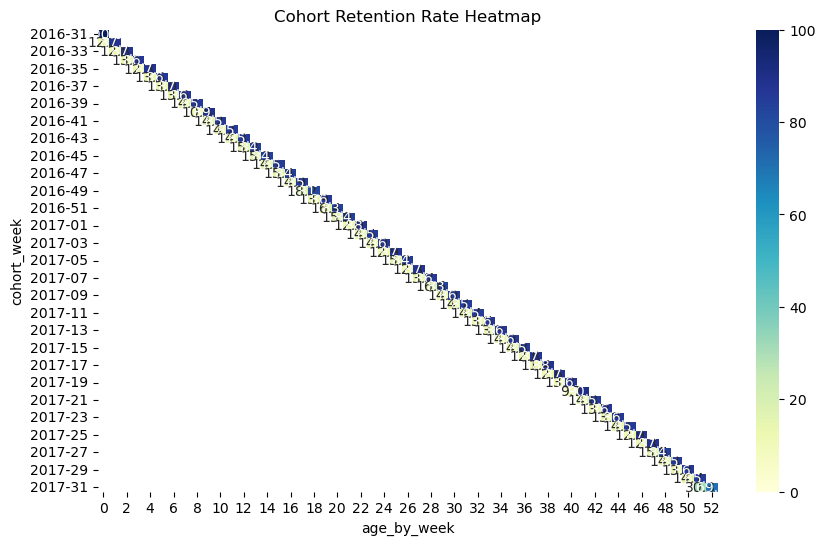

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


heatmap_data = cohort_retention.pivot(index='cohort_week', columns='age_by_week', values='retention_rate_percent')


plt.figure(figsize=(10, 6))
sns.heatmap(data=heatmap_data, annot=True, fmt=".1f", vmin=0, vmax=100, cmap='YlGnBu')
plt.title('Cohort Retention Rate Heatmap')
plt.show()
